**Predictive CPU**

# Create Dataset

In [ ]:
import numpy as np
import pandas as pd

# Create a time range
date_rng = pd.date_range(start='1/1/2020', end='1/01/2022', freq='H')
len(date_rng)

17545

In [ ]:
df = pd.DataFrame(date_rng, columns=['timestamp'])

In [ ]:
# Create a DataFrame with time and synthetic CPU usage data
np.random.seed(42)
df['cpu_usage'] = np.random.normal(loc=50, scale=10, size=(len(date_rng)))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17545 entries, 0 to 17544
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  17545 non-null  datetime64[ns]
 1   cpu_usage  17545 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 274.3 KB


In [ ]:
df.describe()

,timestamp,cpu_usage
count,17545,17545.000000
mean,2020-12-31 12:00:00,50.045948
min,2020-01-01 00:00:00,10.775997
25%,2020-07-01 18:00:00,43.348597
50%,2020-12-31 12:00:00,50.067998
75%,2021-07-02 06:00:00,56.778753
max,2022-01-01 00:00:00,94.790843
std,NaN,10.023089


In [ ]:
df.head()

,timestamp,cpu_usage
0,2020-01-01 00:00:00,54.967142
1,2020-01-01 01:00:00,48.617357
2,2020-01-01 02:00:00,56.476885
3,2020-01-01 03:00:00,65.230299
4,2020-01-01 04:00:00,47.658466


In [ ]:
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

In [ ]:
df.head()

,timestamp,cpu_usage,hour,day_of_week
0,2020-01-01 00:00:00,54.967142,0,2
1,2020-01-01 01:00:00,48.617357,1,2
2,2020-01-01 02:00:00,56.476885,2,2
3,2020-01-01 03:00:00,65.230299,3,2
4,2020-01-01 04:00:00,47.658466,4,2


In [ ]:
for lag in range(1, 25):  # Create lag features for the past 24 hours
    df[f'lag_{lag}'] = df['cpu_usage'].shift(lag)

In [ ]:
df.head()

,timestamp,cpu_usage,hour,day_of_week,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
0,2020-01-01 00:00:00,54.967142,0,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01 01:00:00,48.617357,1,2,54.967142,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 02:00:00,56.476885,2,2,48.617357,54.967142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 03:00:00,65.230299,3,2,56.476885,48.617357,54.967142,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01 04:00:00,47.658466,4,2,65.230299,56.476885,48.617357,54.967142,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['rolling_mean'] = df['cpu_usage'].rolling(window=24).mean()

In [ ]:
df['rolling_std'] = df['cpu_usage'].rolling(window=24).std()

In [ ]:
df.head(24)

,timestamp,cpu_usage,hour,day_of_week,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean,rolling_std
0,2020-01-01 00:00:00,54.967142,0,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01 01:00:00,48.617357,1,2,54.967142,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 02:00:00,56.476885,2,2,48.617357,54.967142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 03:00:00,65.230299,3,2,56.476885,48.617357,54.967142,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01 04:00:00,47.658466,4,2,65.230299,56.476885,48.617357,54.967142,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-01 05:00:00,47.658630,5,2,47.658466,65.230299,56.476885,48.617357,54.967142,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-01-01 06:00:00,65.792128,6,2,47.658630,47.658466,65.230299,56.476885,48.617357,54.967142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-01-01 07:00:00,57.674347,7,2,65.792128,47.658630,47.658466,65.230299,56.476885,48.617357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-01-01 08:00:00,45.305256,8,2,57.674347,65.792128,47.658630,47.658466,65.230299,56.476885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-01-01 09:00:00,55.425600,9,2,45.305256,57.674347,65.792128,47.658630,47.658466,65.230299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,timestamp,cpu_usage,hour,day_of_week,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean,rolling_std
24,2020-01-02 00:00:00,44.556173,0,3,35.752518,50.675282,47.742237,64.656488,35.876963,40.919759,...,57.674347,65.792128,47.658630,47.658466,65.230299,56.476885,48.617357,54.967142,48.089827,9.669718
25,2020-01-02 01:00:00,51.109226,1,3,44.556173,35.752518,50.675282,47.742237,64.656488,35.876963,...,45.305256,57.674347,65.792128,47.658630,47.658466,65.230299,56.476885,48.617357,48.193655,9.688988
26,2020-01-02 02:00:00,38.490064,2,3,51.109226,44.556173,35.752518,50.675282,47.742237,64.656488,...,55.425600,45.305256,57.674347,65.792128,47.658630,47.658466,65.230299,56.476885,47.444204,9.716026
27,2020-01-02 03:00:00,53.756980,3,3,38.490064,51.109226,44.556173,35.752518,50.675282,47.742237,...,45.365823,55.425600,45.305256,57.674347,65.792128,47.658630,47.658466,65.230299,46.966149,9.063179
28,2020-01-02 04:00:00,43.993613,4,3,53.756980,38.490064,51.109226,44.556173,35.752518,50.675282,...,45.342702,45.365823,55.425600,45.305256,57.674347,65.792128,47.658630,47.658466,46.813447,9.081862


# Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [ ]:
# Split the data into training and testing sets
X = df.drop(['cpu_usage', 'timestamp'], axis=1)
y = df[['cpu_usage']]

In [ ]:
X.columns

Index(['hour', 'day_of_week', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5',
       'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12',
       'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19',
       'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'rolling_mean',
       'rolling_std'],
      dtype='object')

In [ ]:
X = pd.DataFrame(x_scaler.fit_transform(X), columns=X.columns)

In [ ]:
y = y_scaler.fit_transform(y)

In [ ]:
type(X), type(y)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [ ]:
data = X.copy()
data['cpu_usuage'] = y

# Save to CSV
data.to_csv('server_cpu_usage_data.csv', index=False)

# Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
len(X_train.iloc[0])

28

In [ ]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [ ]:
X_train.shape

(14016, 28)

In [ ]:
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_train.shape

(14016, 28, 1)

# Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Training

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
438/438 [==============================] - 17s 30ms/step - loss: 0.0148 - val_loss: 0.0147
Epoch 2/15
438/438 [==============================] - 12s 28ms/step - loss: 0.0146 - val_loss: 0.0150
Epoch 3/15
438/438 [==============================] - 12s 28ms/step - loss: 0.0145 - val_loss: 0.0140
Epoch 4/15
438/438 [==============================] - 12s 28ms/step - loss: 0.0144 - val_loss: 0.0141
Epoch 5/15
438/438 [==============================] - 12s 28ms/step - loss: 0.0142 - val_loss: 0.0140
Epoch 6/15
438/438 [==============================] - 13s 29ms/step - loss: 0.0138 - val_loss: 0.0134
Epoch 7/15
438/438 [==============================] - 13s 30ms/step - loss: 0.0132 - val_loss: 0.0141
Epoch 8/15
438/438 [==============================] - 13s 30ms/step - loss: 0.0124 - val_loss: 0.0113
Epoch 9/15
438/438 [==============================] - 13s 30ms/step - loss: 0.0106 - val_loss: 0.0092
Epoch 10/15
438/438 [==============================] - 13s 30ms/step - loss: 0.008

# Evaluation

In [ ]:
predictions = model.predict(X_test)

110/110 [==============================] - 2s 10ms/step


In [ ]:
predictions.shape

(3505, 1)

In [ ]:
predictions[:5]

array([[0.4031871 ],
       [0.37745303],
       [0.57796365],
       [0.44909972],
       [0.4227765 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

0.0032181532548263884

In [ ]:
predictions[0]

array([0.4031871], dtype=float32)

In [ ]:
predictions = y_scaler.inverse_transform(predictions)

In [ ]:
predictions[:5]

array([[44.649696],
       [42.48765 ],
       [59.333523],
       [48.50704 ],
       [46.295498]], dtype=float32)

# Prediction

In [ ]:
from datetime import datetime
import pytz

# Define the timezone for India
india_timezone = pytz.timezone('Asia/Kolkata')

# Get current timestamp in UTC
utc_timestamp = datetime.now(pytz.utc)

# Convert UTC timestamp to India timezone
india_timestamp = utc_timestamp.astimezone(india_timezone)

# Extract hour and day of the week
current_hour = india_timestamp.hour
current_day_of_week = india_timestamp.weekday()  # Monday is 0 and Sunday is 6

print("India Timestamp:", india_timestamp)
print("Current Hour:", current_hour)
print("Current Day of Week:", current_day_of_week)

India Timestamp: 2024-07-13 09:28:48.949956+05:30
Current Hour: 9
Current Day of Week: 5


In [ ]:
filtered_data = df[(df['hour'] == current_hour) & (df['day_of_week'] == current_day_of_week)]

In [ ]:
fil = filtered_data.head(3).drop(['cpu_usage', 'timestamp'], axis=1)

In [ ]:
fil = pd.DataFrame(x_scaler.transform(fil), columns=fil.columns)
fil

,hour,day_of_week,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean,rolling_std
0,0.391304,0.833333,0.440723,0.230296,0.477792,0.431280,0.477231,0.564698,0.155051,0.653104,...,0.563582,0.324490,0.335187,0.444772,0.409835,0.582986,0.506299,0.430065,0.520270,0.497493
1,0.391304,0.833333,0.677006,0.389106,0.410339,0.427055,0.324003,0.569918,0.526977,0.453213,...,0.472294,0.492634,0.379937,0.547760,0.381730,0.338590,0.474521,0.596484,0.468015,0.408139
2,0.391304,0.833333,0.651498,0.377780,0.506424,0.618947,0.284270,0.333008,0.551571,0.528102,...,0.277091,0.614203,0.453237,0.628017,0.262961,0.411026,0.607255,0.684862,0.484091,0.433806


In [ ]:
fil = fil.values.reshape((fil.shape[0], fil.shape[1], 1))

In [ ]:
fil.shape

(3, 28, 1)

In [ ]:
res = model.predict(fil)

1/1 [==============================] - 0s 52ms/step


In [ ]:
res

array([[0.49839735],
       [0.5499657 ],
       [0.5423319 ]], dtype=float32)

In [ ]:
res = y_scaler.inverse_transform(res)

In [ ]:
res

array([[52.648773],
       [56.981277],
       [56.339924]], dtype=float32)

# ---

**Anamaly Detection**

# Create Dataset

In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Function to generate random datetime within a range
def random_date(start, end):
    return start + timedelta(seconds=random.randint(0, int((end - start).total_seconds())))

# Generate simulated network data with anomalies
def generate_network_data_with_anomalies(num_records):
    start_date = datetime(2024, 7, 1, 0, 0, 0)
    end_date = datetime(2024, 7, 14, 0, 0, 0)
    data = []

    for _ in range(num_records):
        timestamp = random_date(start_date, end_date)
        latency = random.randint(10, 50)
        bandwidth = random.randint(900, 1100)
        packets_sent = random.randint(950, 1050)

        # Introduce anomalies
        if random.random() < 0.1:  # 10% chance of anomaly
            # Simulate high latency anomaly
            latency = random.randint(100, 200)

        if random.random() < 0.05:  # 5% chance of anomaly
            # Simulate packet loss anomaly
            packets_lost = random.randint(20, 50)
        else:
            packets_lost = random.randint(0, 10)

        data.append([timestamp.strftime('%Y-%m-%d %H:%M:%S'), latency, bandwidth, packets_sent, packets_lost])

    return pd.DataFrame(data, columns=['timestamp', 'latency', 'bandwidth', 'packets_sent', 'packets_lost'])

# Generate 1000 records with anomalies
num_records = 1000
df = generate_network_data_with_anomalies(num_records)

# Save to CSV
df.to_csv('network_data_with_anomalies.csv', index=False)

print(f"Generated {num_records} records with anomalies in 'network_data_with_anomalies.csv'.")


Generated 1000 records with anomalies in 'network_data_with_anomalies.csv'.


# Analyse Data

In [ ]:
import pandas as pd

# Read CSV file
df = pd.read_csv('network_data_with_anomalies.csv', parse_dates=['timestamp'])

# Display first few rows of the dataframe
print(df.head())


            timestamp  latency  bandwidth  packets_sent  packets_lost
0 2024-07-07 16:41:07       27        902           958             1
1 2024-07-13 04:32:18       41       1062           982             2
2 2024-07-10 04:56:16       43       1038          1006             6
3 2024-07-10 14:00:19       42       1024           988             0
4 2024-07-10 20:41:34       12        988           951             2


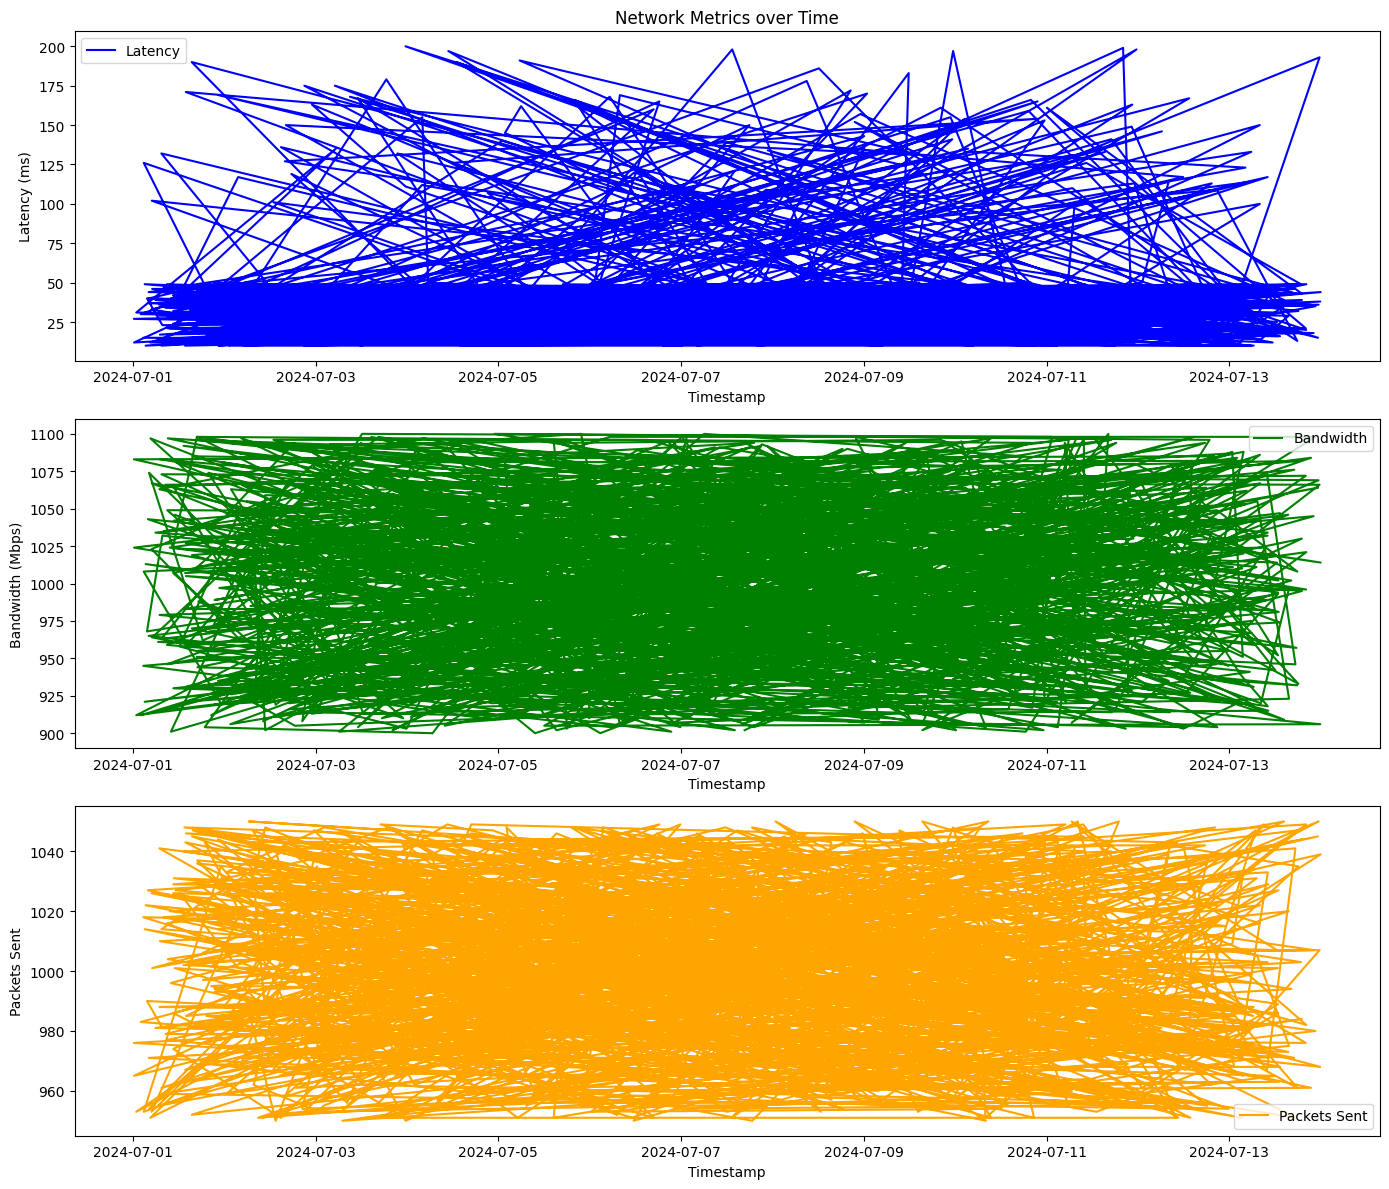

In [ ]:
import matplotlib.pyplot as plt

# Plotting network metrics over time
plt.figure(figsize=(14, 12))

# Latency plot
plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['latency'], label='Latency', color='blue')
plt.title('Network Metrics over Time')
plt.xlabel('Timestamp')
plt.ylabel('Latency (ms)')
plt.legend()

# Bandwidth plot
plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['bandwidth'], label='Bandwidth', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Bandwidth (Mbps)')
plt.legend()

# Packets Sent plot
plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['packets_sent'], label='Packets Sent', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Packets Sent')
plt.legend()

plt.tight_layout()
plt.show()


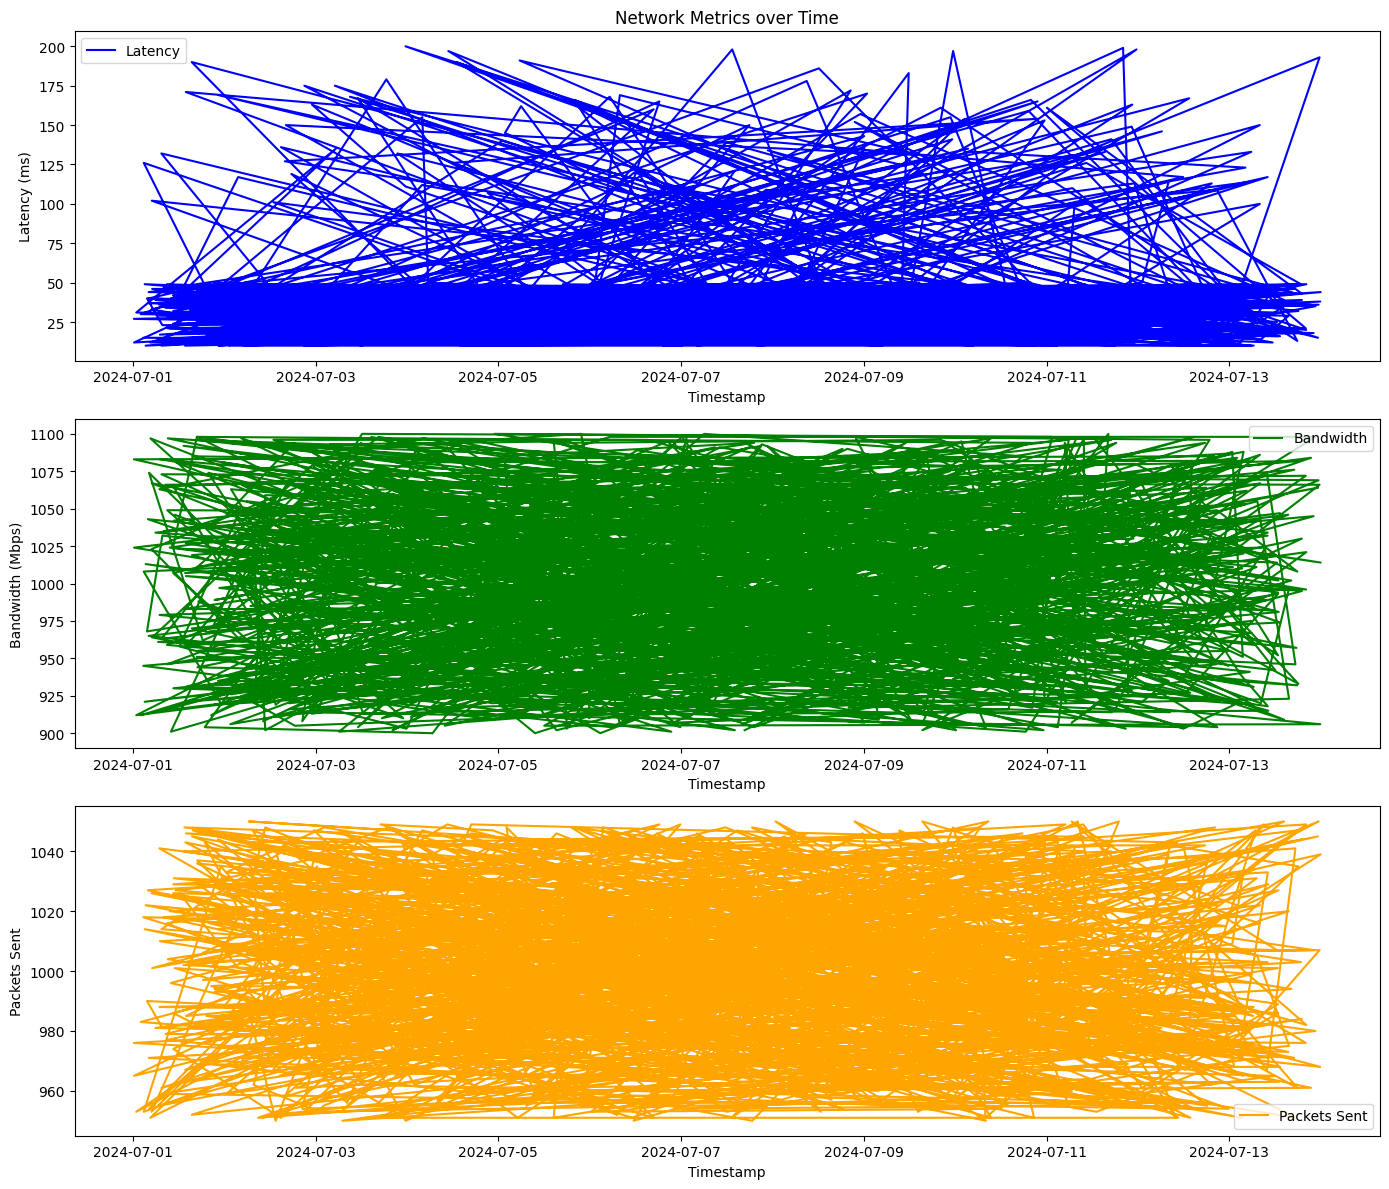

In [ ]:
import matplotlib.pyplot as plt

# Plotting network metrics over time
plt.figure(figsize=(14, 12))

# Latency plot
plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['latency'], label='Latency', color='blue')
plt.title('Network Metrics over Time')
plt.xlabel('Timestamp')
plt.ylabel('Latency (ms)')
plt.legend()

# Bandwidth plot
plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['bandwidth'], label='Bandwidth', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Bandwidth (Mbps)')
plt.legend()

# Packets Sent plot
plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['packets_sent'], label='Packets Sent', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Packets Sent')
plt.legend()

plt.tight_layout()
plt.show()


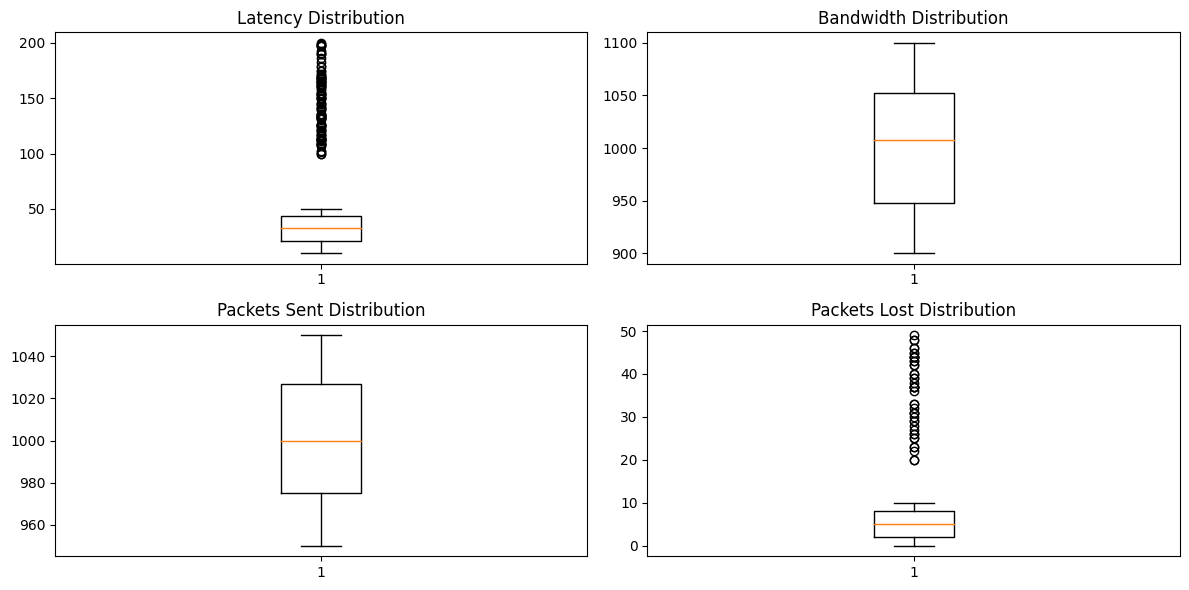

In [ ]:
# Box plot for metrics distribution
plt.figure(figsize=(12, 6))

# Latency box plot
plt.subplot(2, 2, 1)
plt.boxplot(df['latency'])
plt.title('Latency Distribution')

# Bandwidth box plot
plt.subplot(2, 2, 2)
plt.boxplot(df['bandwidth'])
plt.title('Bandwidth Distribution')

# Packets Sent box plot
plt.subplot(2, 2, 3)
plt.boxplot(df['packets_sent'])
plt.title('Packets Sent Distribution')

# Packets Lost box plot
plt.subplot(2, 2, 4)
plt.boxplot(df['packets_lost'])
plt.title('Packets Lost Distribution')

plt.tight_layout()
plt.show()


# Build Model and Detect Anomalies

In [ ]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)

# Prepare features (excluding timestamp) for anomaly detection
X = df[['latency', 'bandwidth', 'packets_sent', 'packets_lost']]

# Fit the model and predict anomalies
df['anomaly'] = model.fit_predict(X)

# Filter anomalies
anomalies = df[df['anomaly'] == -1]

# Print detected anomalies
print("Detected Anomalies:")
print(anomalies)


Detected Anomalies:
              timestamp  latency  bandwidth  packets_sent  packets_lost  \
8   2024-07-10 08:09:03       42        931          1035            31   
10  2024-07-06 18:17:05      165       1065          1049             3   
23  2024-07-03 11:08:08      167        904           974             3   
37  2024-07-13 23:41:58      193       1066          1007            44   
58  2024-07-09 23:26:21      197       1056          1048             5   
..                  ...      ...        ...           ...           ...   
917 2024-07-04 13:44:05       19       1011           956            26   
934 2024-07-08 11:07:25       24       1072           962            20   
950 2024-07-07 10:04:45       12       1091           996            37   
967 2024-07-10 21:39:56      154        993           985             0   
976 2024-07-09 00:05:14      143        953           987             0   

     anomaly  
8         -1  
10        -1  
23        -1  
37        -1  
58  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


# Plot Anomalies

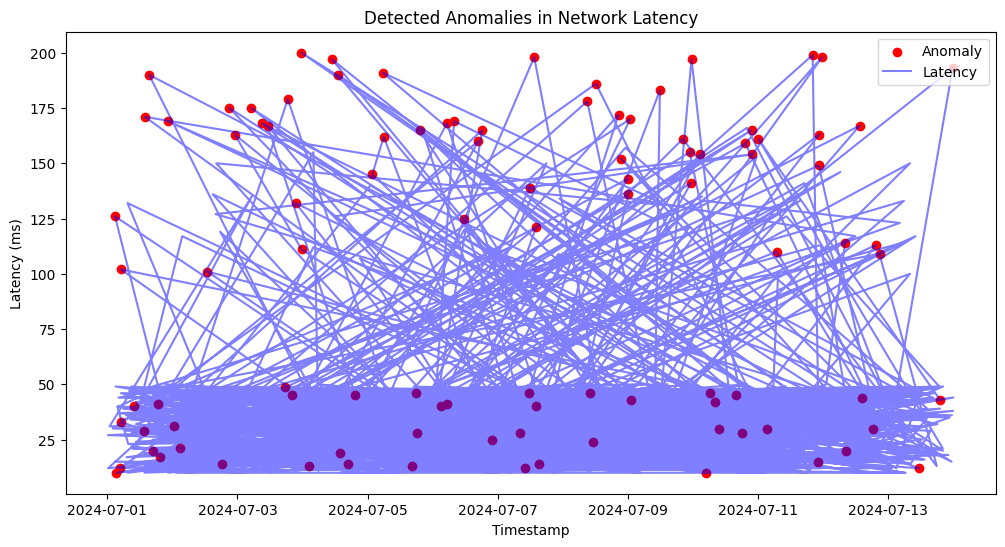

In [ ]:
# Scatter plot of anomalies
plt.figure(figsize=(12, 6))

plt.scatter(anomalies['timestamp'], anomalies['latency'], color='red', label='Anomaly')
plt.plot(df['timestamp'], df['latency'], label='Latency', color='blue', alpha=0.5)
plt.title('Detected Anomalies in Network Latency')
plt.xlabel('Timestamp')
plt.ylabel('Latency (ms)')
plt.legend()
plt.show()


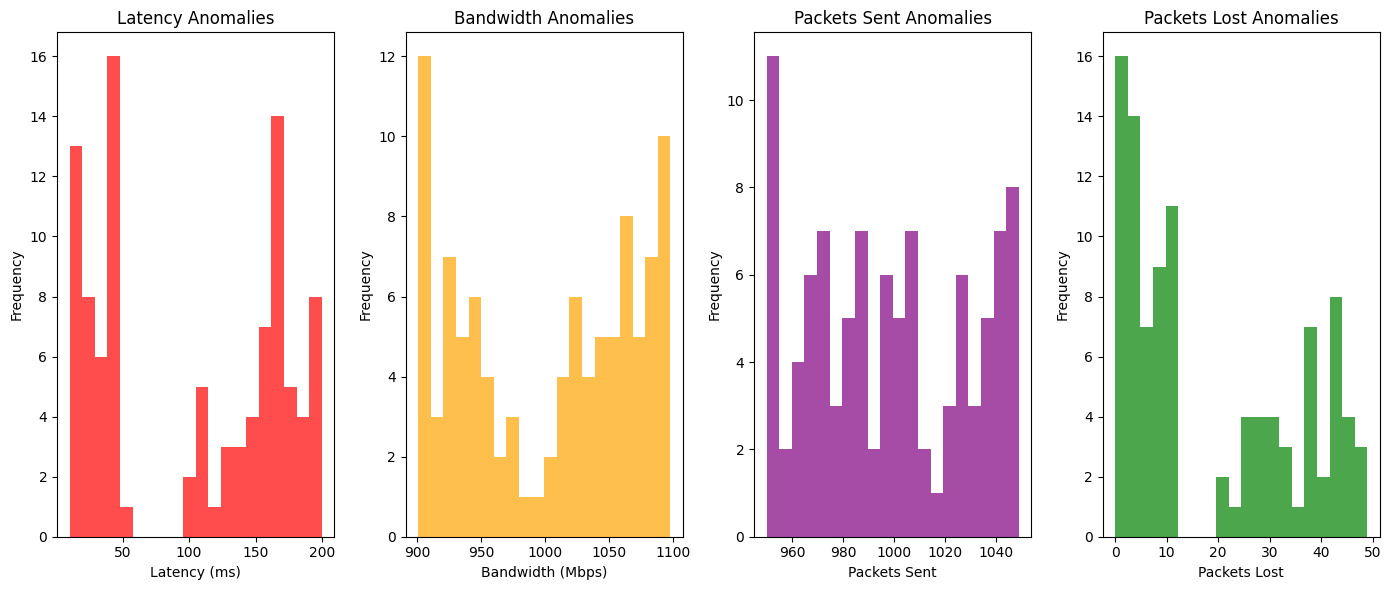

In [ ]:
# Histogram of anomalies by metric
plt.figure(figsize=(14, 6))

# Latency anomalies
plt.subplot(1, 4, 1)
plt.hist(anomalies['latency'], bins=20, color='red', alpha=0.7)
plt.title('Latency Anomalies')
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')

# Bandwidth anomalies
plt.subplot(1, 4, 2)
plt.hist(anomalies['bandwidth'], bins=20, color='orange', alpha=0.7)
plt.title('Bandwidth Anomalies')
plt.xlabel('Bandwidth (Mbps)')
plt.ylabel('Frequency')

# Packets Sent anomalies
plt.subplot(1, 4, 3)
plt.hist(anomalies['packets_sent'], bins=20, color='purple', alpha=0.7)
plt.title('Packets Sent Anomalies')
plt.xlabel('Packets Sent')
plt.ylabel('Frequency')

# Packets Lost anomalies
plt.subplot(1, 4, 4)
plt.hist(anomalies['packets_lost'], bins=20, color='green', alpha=0.7)
plt.title('Packets Lost Anomalies')
plt.xlabel('Packets Lost')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# --

**Resource Utilization Optmization**

# Create Dataset

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

Asset Inventory

In [ ]:
import pandas as pd

# Sample asset inventory
data = {
    'Asset ID': [1, 2, 3, 4, 5],
    'Asset Type': ['Desktop', 'Monitor', 'Keyboard', 'Projector', 'Desktop'],
    'Purchase Date': ['2020-01-01', '2019-06-15', '2021-08-30', '2018-12-12', '2019-01-25'],
    'Last Maintenance Date': ['2023-01-01', '2022-06-15', '2023-08-30', '2022-12-12', '2022-01-25'],
    'Status': ['Active', 'Active', 'Active', 'Inactive', 'Active']
}

assets_df = pd.DataFrame(data)
assets_df['Purchase Date'] = pd.to_datetime(assets_df['Purchase Date'])
assets_df['Last Maintenance Date'] = pd.to_datetime(assets_df['Last Maintenance Date'])

print(assets_df)


   Asset ID Asset Type Purchase Date Last Maintenance Date    Status
0         1    Desktop    2020-01-01            2023-01-01    Active
1         2    Monitor    2019-06-15            2022-06-15    Active
2         3   Keyboard    2021-08-30            2023-08-30    Active
3         4  Projector    2018-12-12            2022-12-12  Inactive
4         5    Desktop    2019-01-25            2022-01-25    Active


 Resource Utilization Optimization

In [ ]:
import numpy as np

# Simulate usage hours
np.random.seed(42)
assets_df['Usage Hours Per Week'] = np.random.randint(5, 40, size=len(assets_df))

# Calculate utilization rate (assuming a 40-hour work week)
assets_df['Utilization Rate'] = assets_df['Usage Hours Per Week'] / 40 * 100

print(assets_df)


   Asset ID Asset Type Purchase Date Last Maintenance Date    Status  \
0         1    Desktop    2020-01-01            2023-01-01    Active   
1         2    Monitor    2019-06-15            2022-06-15    Active   
2         3   Keyboard    2021-08-30            2023-08-30    Active   
3         4  Projector    2018-12-12            2022-12-12  Inactive   
4         5    Desktop    2019-01-25            2022-01-25    Active   

   Usage Hours Per Week  Utilization Rate  
0                    33              82.5  
1                    19              47.5  
2                    12              30.0  
3                    25              62.5  
4                    23              57.5  


# Build Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Simulate asset age (years) and lifespan (years)
assets_df['Age'] = (pd.Timestamp('now') - assets_df['Purchase Date']).dt.days / 365
assets_df['Expected Lifespan'] = np.random.randint(3, 7, size=len(assets_df))

# Prepare data for modeling
X = assets_df[['Age']].values
y = assets_df['Expected Lifespan'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict end-of-life
assets_df['Predicted End-of-Life (years)'] = model.predict(assets_df[['Age']])

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print(assets_df)


Mean Squared Error: 0.103869738309059
   Asset ID Asset Type Purchase Date Last Maintenance Date    Status  \
0         1    Desktop    2020-01-01            2023-01-01    Active   
1         2    Monitor    2019-06-15            2022-06-15    Active   
2         3   Keyboard    2021-08-30            2023-08-30    Active   
3         4  Projector    2018-12-12            2022-12-12  Inactive   
4         5    Desktop    2019-01-25            2022-01-25    Active   

   Usage Hours Per Week  Utilization Rate       Age  Expected Lifespan  \
0                    33              82.5  4.536986                  5   
1                    19              47.5  5.084932                  5   
2                    12              30.0  2.873973                  5   
3                    25              62.5  5.591781                  6   
4                    23              57.5  5.471233                  3   

   Predicted End-of-Life (years)  
0                       4.762632  
1             

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Visualization

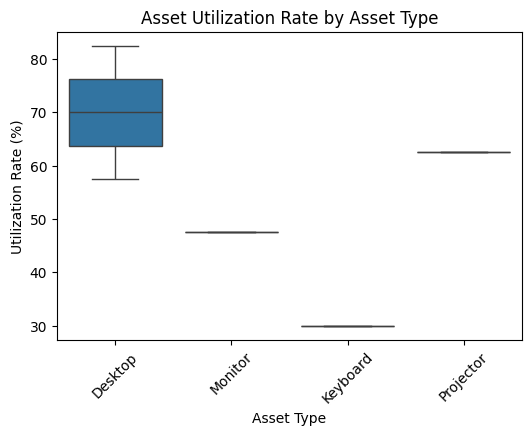

In [ ]:
# Box plot of asset utilization rate
plt.figure(figsize=(6,4))
sns.boxplot(data=assets_df, x='Asset Type', y='Utilization Rate')
plt.title('Asset Utilization Rate by Asset Type')
plt.xlabel('Asset Type')
plt.ylabel('Utilization Rate (%)')
plt.xticks(rotation=45)
plt.show()


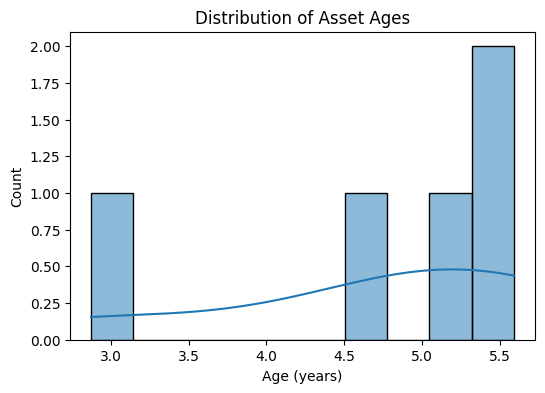

In [ ]:
# Distribution plot of asset ages
plt.figure(figsize=(6,4))
sns.histplot(assets_df['Age'], bins=10, kde=True)
plt.title('Distribution of Asset Ages')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()


<ipython-input-10-ee5e99ce84af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=assets_df, x='Status', palette='Set2')


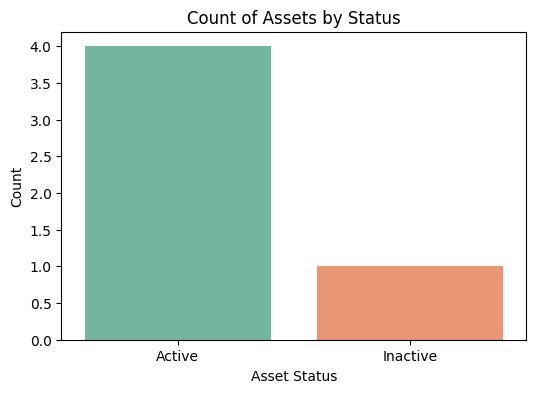

In [ ]:
# Bar plot of asset status
plt.figure(figsize=(6,4))
sns.countplot(data=assets_df, x='Status', palette='Set2')
plt.title('Count of Assets by Status')
plt.xlabel('Asset Status')
plt.ylabel('Count')
plt.show()


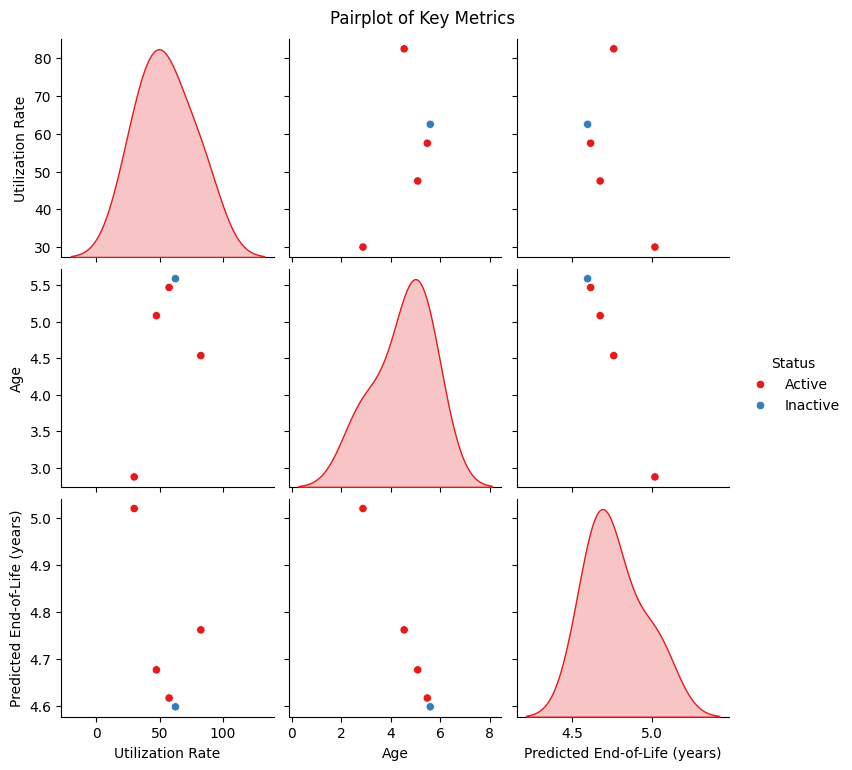

In [ ]:
# Pairplot for correlations
sns.pairplot(assets_df[['Utilization Rate', 'Age', 'Predicted End-of-Life (years)', 'Status']], hue='Status', palette='Set1')
plt.suptitle('Pairplot of Key Metrics', y=1.02)
plt.show()


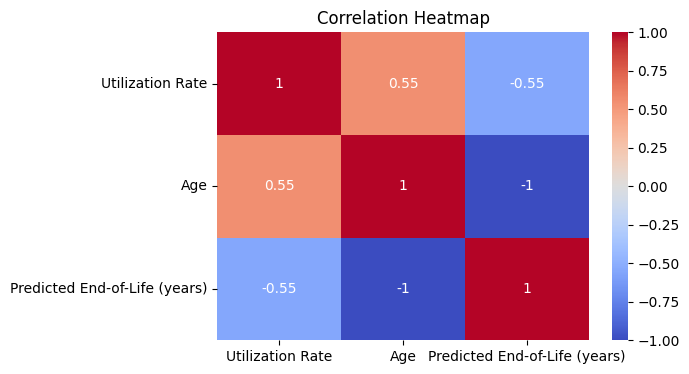

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6,4))
correlation_matrix = assets_df[['Utilization Rate', 'Age', 'Predicted End-of-Life (years)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-14-666cdfc5b728>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=assets_df, x='Asset Type', y='Utilization Rate', palette='pastel')


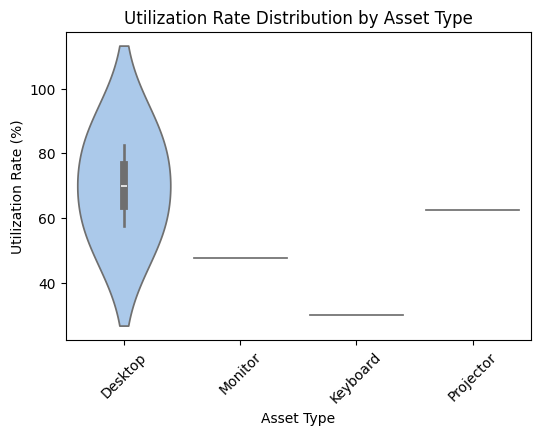

In [ ]:
# Violin plot of utilization rate by asset type
plt.figure(figsize=(6,4))
sns.violinplot(data=assets_df, x='Asset Type', y='Utilization Rate', palette='pastel')
plt.title('Utilization Rate Distribution by Asset Type')
plt.xlabel('Asset Type')
plt.ylabel('Utilization Rate (%)')
plt.xticks(rotation=45)
plt.show()


Insights


In [ ]:
# Example insights
high_utilization_assets = assets_df[assets_df['Utilization Rate'] > 80]
print("High Utilization Assets:")
print(high_utilization_assets)

near_end_of_life_assets = assets_df[assets_df['Predicted End-of-Life (years)'] < 1]
print("Assets Near End-of-Life:")
print(near_end_of_life_assets)


High Utilization Assets:
   Asset ID Asset Type Purchase Date Last Maintenance Date  Status  \
0         1    Desktop    2020-01-01            2023-01-01  Active   

   Usage Hours Per Week  Utilization Rate       Age  Expected Lifespan  \
0                    33              82.5  4.536986                  5   

   Predicted End-of-Life (years)  
0                       4.762632  
Assets Near End-of-Life:
Empty DataFrame
Columns: [Asset ID, Asset Type, Purchase Date, Last Maintenance Date, Status, Usage Hours Per Week, Utilization Rate, Age, Expected Lifespan, Predicted End-of-Life (years)]
Index: []
